# 1. RL Model

In [1]:
#https://github.com/shivaverma/OpenAIGym/blob/master/lunar-lander/discrete/lunar_lander.py
import gym
import random
from keras import Sequential
from collections import deque
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.activations import relu, linear
import pandas as pd

import numpy as np
env = gym.make('LunarLander-v2')
env.seed(0)
np.random.seed(0)


class DQN:

    """ Implementation of deep q learning algorithm """

    def __init__(self, action_space, state_space):

        self.action_space = action_space
        self.state_space = state_space
        self.epsilon = 1.0
        self.gamma = .99
        self.batch_size = 64
        self.epsilon_min = .01
        #self.lr = 0.001
        self.learning_rate = 0.001
        self.epsilon_decay = .996
        self.memory = deque(maxlen=1000000)
        self.model = self.build_model()

    def build_model(self):

        model = Sequential()
        model.add(Dense(150, input_dim=self.state_space, activation=relu))
        model.add(Dense(120, activation=relu))
        model.add(Dense(self.action_space, activation=linear))
        #model.compile(loss='mse', optimizer=Adam(lr=self.lr))
        model.compile(loss='mse', optimizer=Adam(learning_rate=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):

        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_space)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self):

        if len(self.memory) < self.batch_size:
            return

        minibatch = random.sample(self.memory, self.batch_size)
        states = np.array([i[0] for i in minibatch])
        actions = np.array([i[1] for i in minibatch])
        rewards = np.array([i[2] for i in minibatch])
        next_states = np.array([i[3] for i in minibatch])
        dones = np.array([i[4] for i in minibatch])

        states = np.squeeze(states)
        next_states = np.squeeze(next_states)

        targets = rewards + self.gamma*(np.amax(self.model.predict_on_batch(next_states), axis=1))*(1-dones)
        targets_full = self.model.predict_on_batch(states)
        ind = np.array([i for i in range(self.batch_size)])
        targets_full[[ind], [actions]] = targets

        self.model.fit(states, targets_full, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


def train_dqn(episode):

    loss = []
    agent = DQN(env.action_space.n, env.observation_space.shape[0])
    replay_info=deque()########
    for e in range(episode):
        state = env.reset()
        state = np.reshape(state, (1, 8))
        score = 0
        max_steps = 3000
        for i in range(max_steps):
            action = agent.act(state)
            env.render()
            next_state, reward, done, _ = env.step(action)
            score += reward
            next_state = np.reshape(next_state, (1, 8))
            agent.remember(state, action, reward, next_state, done)
            replay_info.append((state, action, reward, next_state, done))#########
            state = next_state
            agent.replay()
            if done:
                print("episode: {}/{}, score: {}".format(e, episode, score))
                break
        loss.append(score)
        df=pd.DataFrame(replay_info)########
        df.columns = ['state', 'action', 'reward','new_state','done']#####
        train_dqn.replay_df=df######

        # Average score of last 100 episode
        is_solved = np.mean(loss[-100:])
        if is_solved > 200:
            print('\n Task Completed! \n')
            break
        print("Average over last 100 episode: {0:.2f} \n".format(is_solved))
    return loss


if __name__ == '__main__':
    episodes = 400
    loss = train_dqn(episodes)
    #display(train_dqn.replay_df)#####
    print("finished")#######
    #plt.plot([i+1 for i in range(0, len(loss), 2)], loss[::2])
    #plt.show()

episode: 0/400, score: -135.2657377595263
Average over last 100 episode: -135.27 

episode: 1/400, score: -69.1970062912162
Average over last 100 episode: -102.23 

episode: 2/400, score: -227.79894116334833
Average over last 100 episode: -144.09 

episode: 3/400, score: -123.81131363827346
Average over last 100 episode: -139.02 

episode: 4/400, score: -356.63443802411615
Average over last 100 episode: -182.54 

episode: 5/400, score: -502.70904510284964
Average over last 100 episode: -235.90 

episode: 6/400, score: -122.02111311608286
Average over last 100 episode: -219.63 

episode: 7/400, score: -224.173755425021
Average over last 100 episode: -220.20 

episode: 8/400, score: -455.21718362479083
Average over last 100 episode: -246.31 

episode: 9/400, score: -127.2896583390106
Average over last 100 episode: -234.41 

episode: 10/400, score: -153.43056820016548
Average over last 100 episode: -227.05 

episode: 11/400, score: -150.7246071026252
Average over last 100 episode: -220.69

episode: 98/400, score: 261.39648950354945
Average over last 100 episode: -97.06 

episode: 99/400, score: 213.56614119937683
Average over last 100 episode: -93.95 

episode: 100/400, score: 264.66553384827273
Average over last 100 episode: -89.95 

episode: 101/400, score: -17.25722355170329
Average over last 100 episode: -89.43 

episode: 102/400, score: 234.63101452377745
Average over last 100 episode: -84.81 

episode: 103/400, score: 175.03070514022428
Average over last 100 episode: -81.82 

episode: 104/400, score: -505.9436903395526
Average over last 100 episode: -83.32 

episode: 105/400, score: 155.63471480409876
Average over last 100 episode: -76.73 

episode: 106/400, score: -160.23855613212302
Average over last 100 episode: -77.11 

episode: 107/400, score: 209.31805877480303
Average over last 100 episode: -72.78 

episode: 108/400, score: -59.21334814423403
Average over last 100 episode: -68.82 

episode: 109/400, score: 20.83524119323656
Average over last 100 episode: -67

episode: 197/400, score: 160.19303212233012
Average over last 100 episode: 133.75 

episode: 198/400, score: 202.34477709879195
Average over last 100 episode: 133.16 

episode: 199/400, score: 210.44939935702112
Average over last 100 episode: 133.12 

episode: 200/400, score: 1.6010911281963445
Average over last 100 episode: 130.49 

episode: 201/400, score: -201.52919082943782
Average over last 100 episode: 128.65 

episode: 202/400, score: 196.29013144304804
Average over last 100 episode: 128.27 

episode: 203/400, score: 38.76333992701342
Average over last 100 episode: 126.90 

episode: 204/400, score: 241.14557750440127
Average over last 100 episode: 134.38 

episode: 205/400, score: 176.72675848687612
Average over last 100 episode: 134.59 

episode: 206/400, score: 226.493992507596
Average over last 100 episode: 138.45 

episode: 207/400, score: 236.8596875527771
Average over last 100 episode: 138.73 

episode: 208/400, score: 260.0446523309294
Average over last 100 episode: 141.9

episode: 295/400, score: 270.03348314435596
Average over last 100 episode: 186.47 

episode: 296/400, score: 264.1227053572526
Average over last 100 episode: 186.86 

episode: 297/400, score: 188.6513852732104
Average over last 100 episode: 187.15 

episode: 298/400, score: 219.5438558641104
Average over last 100 episode: 187.32 

episode: 299/400, score: 248.2536353205922
Average over last 100 episode: 187.70 

episode: 300/400, score: 241.76867769346308
Average over last 100 episode: 190.10 

episode: 301/400, score: 286.9906843960275
Average over last 100 episode: 194.98 

episode: 302/400, score: 237.57609000881334
Average over last 100 episode: 195.40 

episode: 303/400, score: 281.66001204186506
Average over last 100 episode: 197.83 

episode: 304/400, score: 275.1137255747215
Average over last 100 episode: 198.17 

episode: 305/400, score: 276.83432212474565
Average over last 100 episode: 199.17 

episode: 306/400, score: 235.36402665794864
Average over last 100 episode: 199.26 

# 2. Saving Replay Data

In [4]:
df=train_dqn.replay_df
df2=df.copy()
state_name=['xposition', 'yposition','xvelocity','yvelocity','lander_angle','angular_velocity', 'L_contact_point',  'R_contact_point']

for i in range(len(state_name)): 
    list1=[]
    for j in range(df.shape[0]):
        list1.append(df.iloc[j][0][0][i])#j=row, i=column
    df2.insert(i, state_name[i], list1, True)
df2.drop("state", axis=1, inplace=True)


df3=df2.copy()
num=df3.columns.get_loc("new_state")

for i in range(len(df2.iloc[0][num][0])): 
    list1=[]
    for j in range(df2.shape[0]):
        list1.append(df2.iloc[j][num][0][i])
    df3.insert(num+i, "new_{}".format(state_name[i]), list1, True)
df3.drop("new_state", axis=1, inplace=True)
display(df3)

,xposition,yposition,xvelocity,yvelocity,lander_angle,angular_velocity,L_contact_point,R_contact_point,action,reward,new_xposition,new_yposition,new_xvelocity,new_yvelocity,new_lander_angle,new_angular_velocity,new_L_contact_point,new_R_contact_point,done
0,-0.000592,1.413457,-5.993572e-02,1.127710e-01,0.000692,1.357632e-02,0.0,0.0,2,-1.893914e+00,-0.001036,1.416417,-4.588570e-02,1.315347e-01,0.002072,2.759661e-02,0.0,0.0,False
1,-0.001036,1.416417,-4.588570e-02,1.315347e-01,0.002072,2.759661e-02,0.0,0.0,1,1.635798e+00,-0.001544,1.418765,-5.366809e-02,1.043732e-01,0.005011,5.878227e-02,0.0,0.0,False
2,-0.001544,1.418765,-5.366809e-02,1.043732e-01,0.005011,5.878227e-02,0.0,0.0,2,-4.545359e+00,-0.002232,1.421857,-7.097782e-02,1.373839e-01,0.007099,4.177398e-02,0.0,0.0,False
3,-0.002232,1.421857,-7.097782e-02,1.373839e-01,0.007099,4.177398e-02,0.0,0.0,1,1.155078e+00,-0.002992,1.424345,-7.988586e-02,1.105836e-01,0.010974,7.749929e-02,0.0,0.0,False
4,-0.002992,1.424345,-7.988586e-02,1.105836e-01,0.010974,7.749929e-02,0.0,0.0,0,1.478535e+00,-0.003752,1.426234,-7.989772e-02,8.391976e-02,0.014847,7.746457e-02,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155274,-0.106575,-0.000946,-6.753948e-08,1.598406e-10,0.000263,9.079332e-08,1.0,1.0,0,5.516320e-06,-0.106575,-0.000946,1.166934e-08,-1.712995e-09,0.000263,-1.803267e-08,1.0,1.0,False
155275,-0.106575,-0.000946,1.166934e-08,-1.712995e-09,0.000263,-1.803267e-08,1.0,1.0,0,-3.270071e-06,-0.106575,-0.000946,4.917783e-08,-5.425964e-10,0.000263,-9.450888e-08,1.0,1.0,False
155276,-0.106575,-0.000946,4.917783e-08,-5.425964e-10,0.000263,-9.450888e-08,1.0,1.0,0,5.056446e-07,-0.106575,-0.000946,4.802379e-08,2.182050e-10,0.000263,-9.286963e-08,1.0,1.0,False
155277,-0.106575,-0.000946,4.802379e-08,2.182050e-10,0.000263,-9.286963e-08,1.0,1.0,0,1.213244e-06,-0.106575,-0.000946,3.995836e-08,-8.010853e-10,0.000263,-9.658341e-08,1.0,1.0,False


In [5]:
#df3.to_csv('long_lunar_replay.csv')

In [1]:
import pandas as pd
DF=pd.read_csv('long_lunar_replay.csv')
df3=DF.iloc[: , 1:]
df3.head(5)

,xposition,yposition,xvelocity,yvelocity,lander_angle,angular_velocity,L_contact_point,R_contact_point,action,reward,new_xposition,new_yposition,new_xvelocity,new_yvelocity,new_lander_angle,new_angular_velocity,new_L_contact_point,new_R_contact_point,done
0,-0.000592,1.413457,-0.059936,0.112771,0.000692,0.013576,0.0,0.0,2,-1.893914,-0.001036,1.416417,-0.045886,0.131535,0.002072,0.027597,0.0,0.0,False
1,-0.001036,1.416417,-0.045886,0.131535,0.002072,0.027597,0.0,0.0,1,1.635798,-0.001544,1.418765,-0.053668,0.104373,0.005011,0.058782,0.0,0.0,False
2,-0.001544,1.418765,-0.053668,0.104373,0.005011,0.058782,0.0,0.0,2,-4.545359,-0.002232,1.421857,-0.070978,0.137384,0.007099,0.041774,0.0,0.0,False
3,-0.002232,1.421857,-0.070978,0.137384,0.007099,0.041774,0.0,0.0,1,1.155078,-0.002992,1.424345,-0.079886,0.110584,0.010974,0.077499,0.0,0.0,False
4,-0.002992,1.424345,-0.079886,0.110584,0.010974,0.077499,0.0,0.0,0,1.478535,-0.003752,1.426234,-0.079898,0.083920,0.014847,0.077465,0.0,0.0,False


In [2]:
# Determining delta values for each state. Represent the change caused by taking an action

df1=df3.copy()
state_name=list(df3.columns[0:8])

for i in state_name:
    df1['diff_{}'.format(i)]=df1['new_{}'.format(i)]-df1[i]
    df1.drop(['new_{}'.format(i)], axis = 1,inplace=True)

df1.head()

,xposition,yposition,xvelocity,yvelocity,lander_angle,angular_velocity,L_contact_point,R_contact_point,action,reward,done,diff_xposition,diff_yposition,diff_xvelocity,diff_yvelocity,diff_lander_angle,diff_angular_velocity,diff_L_contact_point,diff_R_contact_point
0,-0.000592,1.413457,-0.059936,0.112771,0.000692,0.013576,0.0,0.0,2,-1.893914,False,-0.000445,0.002960,0.014050,0.018764,0.001380,0.014020,0.0,0.0
1,-0.001036,1.416417,-0.045886,0.131535,0.002072,0.027597,0.0,0.0,1,1.635798,False,-0.000507,0.002349,-0.007782,-0.027162,0.002939,0.031186,0.0,0.0
2,-0.001544,1.418765,-0.053668,0.104373,0.005011,0.058782,0.0,0.0,2,-4.545359,False,-0.000689,0.003091,-0.017310,0.033011,0.002089,-0.017008,0.0,0.0
3,-0.002232,1.421857,-0.070978,0.137384,0.007099,0.041774,0.0,0.0,1,1.155078,False,-0.000760,0.002489,-0.008908,-0.026800,0.003875,0.035725,0.0,0.0
4,-0.002992,1.424345,-0.079886,0.110584,0.010974,0.077499,0.0,0.0,0,1.478535,False,-0.000760,0.001889,-0.000012,-0.026664,0.003873,-0.000035,0.0,0.0


# 3. Split by Action

In [5]:
#split df by action
df_action0, df_action1, df_action2, df_action3 = [x for _, x in df1.groupby(df1['action'])]

In [6]:
all_states=[]
for i in state_name:
    all_states.append(i)
    all_states.append("diff_{}".format(i))
print(all_states)

all_and_reward=['reward']
for i in all_states:
    all_and_reward.append(i)
print(all_and_reward)

['xposition', 'diff_xposition', 'yposition', 'diff_yposition', 'xvelocity', 'diff_xvelocity', 'yvelocity', 'diff_yvelocity', 'lander_angle', 'diff_lander_angle', 'angular_velocity', 'diff_angular_velocity', 'L_contact_point', 'diff_L_contact_point', 'R_contact_point', 'diff_R_contact_point']
['reward', 'xposition', 'diff_xposition', 'yposition', 'diff_yposition', 'xvelocity', 'diff_xvelocity', 'yvelocity', 'diff_yvelocity', 'lander_angle', 'diff_lander_angle', 'angular_velocity', 'diff_angular_velocity', 'L_contact_point', 'diff_L_contact_point', 'R_contact_point', 'diff_R_contact_point']


# 4. Determine p-value threshold for each edge

In [ ]:
from fcit import fcit
import numpy as np

for i in all_states:
    for j in all_states:
        if i!=j:
            print(i, j)

            scores=[]
            for z in range(100):
                x=np.random.permutation(df1[i])
                x1=np.array(x)
                x2=x1.reshape((x1.shape[0], 1))

                y=np.random.permutation(df1[j])
                y1=np.array(y)
                y2=y1.reshape((y1.shape[0], 1))

                score=fcit.test(x2, y2)
                scores.append(score)
            p_value=np.quantile(scores, .05)
            print(p_value)

In [7]:
p_values=pd.read_csv('p_values.csv', index_col=0)

reward=[0.01977653169128589,0.011742416025767808, 0.020539857654246804, 0.026254778783282542,
        0.021734075232443646,0.016437642813894402,0.011896152454087709,0.004553125156201113,
        0.03164568217154106,0.014818216904180708,0.019152690837168255,0.03942294216752838,
        0.0074282522453968354,0.03195218184287116,0.011500151408597881,0.03651383797638033]
    
p_values.insert(0, 'reward', reward, allow_duplicates = False)
reward.insert(0,'x')

res=dict(zip(all_and_reward, reward))


new_row=pd.DataFrame(res, index=[0])
p_values = pd.concat([new_row, p_values]).reset_index(drop = True)

p_values.index=all_and_reward

In [8]:
p_values

,reward,xposition,diff_xposition,yposition,diff_yposition,xvelocity,diff_xvelocity,yvelocity,diff_yvelocity,lander_angle,diff_lander_angle,angular_velocity,diff_angular_velocity,L_contact_point,diff_L_contact_point,R_contact_point,diff_R_contact_point
reward,x,0.019777,0.011742,0.02054,0.026255,0.021734,0.016438,0.011896,0.004553,0.031646,0.014818,0.019153,0.039423,0.007428,0.031952,0.0115,0.036514
xposition,0.019777,x,0.012442210970331496,0.0076101850319230556,0.012221087257223196,0.01456851896416855,0.016768383597576743,0.023819977451952357,0.008937777884023949,0.026724341057717822,0.027823236034176996,0.02605800437808283,0.014411368989868317,0.01075179818894229,0.04852514346057702,0.0162408385867723,0.045599350837117435
diff_xposition,0.011742,0.012442210970331496,x,0.020793540765436158,0.011107610347104831,0.012249669552325036,0.023605091063887113,0.041347697348727674,0.01922596839927789,0.03400321978186674,0.008038387091442613,0.012267420329776,0.02346010814128163,0.03048411941607514,0.03071828256795786,0.013202952902481033,0.016836395882669063
yposition,0.02054,0.0076101850319230556,0.020793540765436158,x,0.01015523145599819,0.005732578857375246,0.04465121300852128,0.009487458867468147,0.03099890532957324,0.011649039610729358,0.04983521236666279,0.017465484018037228,0.044788439274694086,0.022805323627593698,0.03325317551381906,0.02046464618940899,0.05535382719149472
diff_yposition,0.026255,0.012221087257223196,0.011107610347104831,0.01015523145599819,x,0.012856742446251252,0.02496471352951641,0.023660105595150305,0.017820432611172155,0.019387534158969964,0.023893062810035545,0.019353569088005618,0.027451151729274557,0.017289564017481843,0.06409373067335809,0.020874328224787495,0.04962507584402449
xvelocity,0.021734,0.01456851896416855,0.012249669552325036,0.005732578857375246,0.012856742446251252,x,0.011272162262021039,0.008816438951498697,0.021283404317527604,0.03348511698422277,0.0230049328422025,0.028342096156997364,0.021411459495306054,0.01614741879121536,0.06457340219455089,0.007869785348834705,0.04594871565195694
diff_xvelocity,0.016438,0.016768383597576743,0.023605091063887113,0.04465121300852128,0.02496471352951641,0.011272162262021039,x,0.005921394722105491,0.014408314965041677,0.015618644766875672,0.022506281739149814,0.022539142663971994,0.024326109175080195,0.02954238153052144,0.04213912460811308,0.017039007866677246,0.05453890741241789
yvelocity,0.011896,0.023819977451952357,0.041347697348727674,0.009487458867468147,0.023660105595150305,0.008816438951498697,0.005921394722105491,x,0.02510776763371097,0.025763263863380022,0.021554366935957397,0.02233402325358477,0.035209486760850305,0.023077503027635896,0.060510441217664065,0.018329631186254386,0.05746585577113119
diff_yvelocity,0.004553,0.008937777884023949,0.01922596839927789,0.03099890532957324,0.017820432611172155,0.021283404317527604,0.014408314965041677,0.02510776763371097,x,0.028005357623979068,0.022868921520352737,0.02310329662234782,0.04802848278726303,0.010519680976579359,0.05782828322753826,0.019421373142881372,0.04679761828889718
lander_angle,0.031646,0.026724341057717822,0.03400321978186674,0.011649039610729358,0.019387534158969964,0.03348511698422277,0.015618644766875672,0.025763263863380022,0.028005357623979068,x,0.03816431773111182,0.052584819806767706,0.016388561682192222,0.017742594681489452,0.05144721604076401,0.01730551332029099,0.040728628671041184


# 5. Form Graphs

In [9]:
from scipy import stats
import pingouin as pg
import networkx as nx
from fcit import fcit 
import numpy as np
import pandas as pd
import pylab
import matplotlib.pyplot as plt

#to get statistically significant edges using each state's p-value threashold
def get_edges(df_actionx):
    used_edges=[]

    for i in state_name:
        x=np.array(df_actionx[i])
        x=x.reshape((x.shape[0], 1))

        r=np.array(df_actionx['reward'])
        r = r.reshape((r.shape[0], 1))
        score1=fcit.test(x, r)
        if score1<float(p_values[i]['reward']):
            used_edges.append([i,'reward', score1])
   
        for old_j in state_name:
            j='diff_{}'.format(old_j)
            y=np.array(df_actionx[j])
            y=y.reshape((y.shape[0], 1))
            
            score=fcit.test(x, y)
            if score<float(p_values[i][j]):
                used_edges.append([i,j,score])
                        
    return(used_edges)

# to only keep top n% of edges (project step 4)
def sort_remove(to_sort, percent_keep):
    def Sort(sub_li):
        sub_li.sort(key = lambda x: x[2])
        return sub_li
    sort=Sort(to_sort)
    
    edgesx=[]
    for i in sort:
        edgesx.append([i[0],i[1]])
    slice1=int(len(edgesx)*percent_keep)
    edgesx=edgesx[:slice1]
    return(edgesx)

# to create graphs with delta nodes included (project step 1)
def diff_graph(df_actionx, used_edges):
    G = nx.DiGraph()

    for i in used_edges:
        x=stats.pearsonr(df_actionx[i[0]], df_actionx[i[1]])
        G.add_edges_from([(i[0], i[1])], weight=x[0])


    all_things=[]
    for j in state_name:
        all_things.append(j)
        all_things.append('diff_{}'.format(j))

    nonode=[]
    for j in all_things:
        i=0
        for l in used_edges:
            if j in l:
                i=1
        if i==0:
            nonode.append(j)
            G.add_node(j, node_color='purple')
    #print(nonode)  
    return G

# to consolidate delta nodes (project step 2)
def combined_graph(df_actionx, used_edges, D):

    for i in state_name:
        D = nx.contracted_nodes(D, i,'diff_{}'.format(i), True)

    self_node=[]
    for i in used_edges:
        x='diff_{}'.format(i[0])
        if i[1]==x:
            self_node.append(i[0])

    return D

#to produce action consolidated nodes (project step 3) 
def auto_combined_graph(df_actionx,pre_sorted_edges, percent):
    new_edgesx=sort_remove(pre_sorted_edges, percent)
    Dx=diff_graph(df_actionx, new_edgesx)
    Gx=combined_graph(df_actionx, new_edgesx, Dx)
    return Gx


def draw(graph):
    pos=nx.spring_layout(graph)
    pylab.figure(1,figsize=(8,8))
    nx.draw(graph,pos, with_labels = True,font_size=13)

In [10]:
edges0=get_edges(df_action0)
edges1=get_edges(df_action1)
edges2=get_edges(df_action2)
edges3=get_edges(df_action3)

# 6. Delta Graphs (Project Step 1)

Action 0--Do Nothing


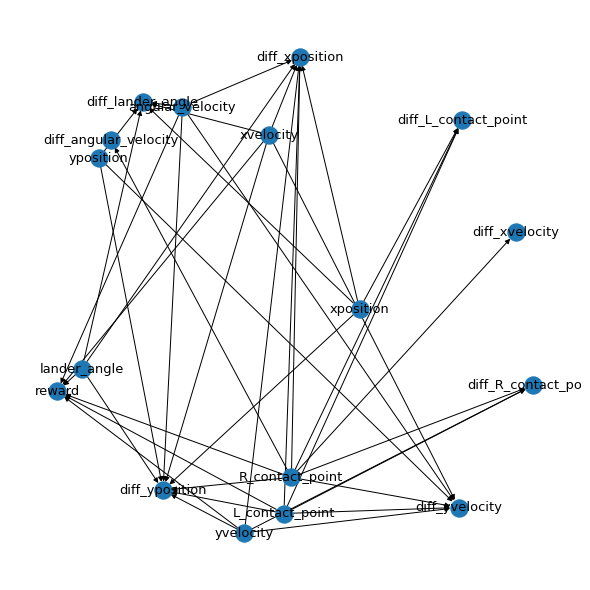

In [15]:
D0=diff_graph(df_action0, edges0)
draw(D0)
print('Action 0--Do Nothing')

In [16]:
D1=diff_graph(df_action1, edges1)
D2=diff_graph(df_action2, edges2)
D3=diff_graph(df_action3, edges3)

# 7. State Consolidated Graphs (Project Step 2)

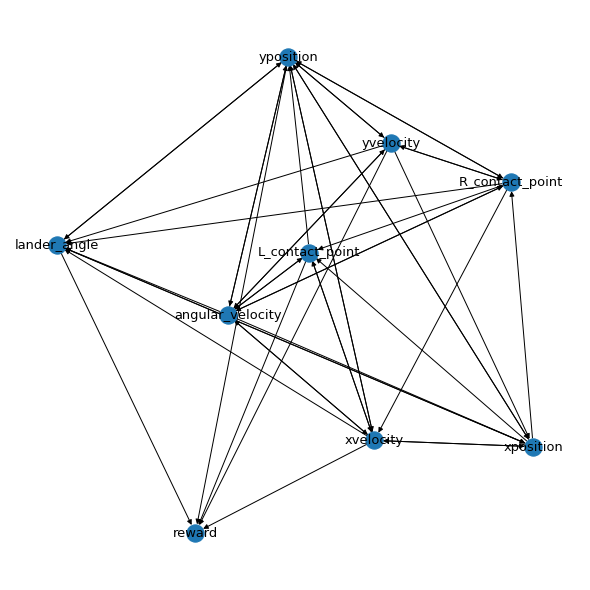

In [17]:
draw(combined_graph(df_action1, edges1, D1))

# 8. Full Causal Network (Project Step 3)

In [22]:
state_and_reward=['reward']
for i in state_name:
    state_and_reward.append(i)

In [23]:
def all_actions_graph(Gr0,Gr1,Gr2,Gr3,highlight):
    all_edges=[list(Gr0.edges),list(Gr1.edges),list(Gr2.edges),list(Gr3.edges)]
    none=[]
    edge_dict={}
    for i in state_and_reward:
        for j in state_and_reward:
            which=[]
            for c in range(len(all_edges)):
                if (i,j) in all_edges[c]:
                    which.append(c)
            if len(which)==0:
                none.append([i,j])
            elif len(which)==1:
                edge_dict[(i,j)]='{}'.format(which[0])
            elif len(which)==2:
                edge_dict[(i,j)]="{},{}".format(which[0], which[1])
            elif len(which)==3:
                edge_dict[(i,j)]="{},{},{}".format(which[0], which[1],which[2])
    #print(edge_dict)
    to_use=[]
    for i in state_and_reward:
        for j in state_and_reward:
            if [i,j] not in none:
                to_use.append([i,j])
                
                
    edges = to_use
    G = nx.Graph()
    G.add_edges_from(edges)
    pos = nx.spring_layout(G)
    plt.figure() 
    
    zero_four=[0,1,2,3]
    if highlight in zero_four:
        if highlight==0:
            list1=list(Gr0.edges)
        elif highlight==1:
            list1=list(Gr1.edges)
        elif highlight==2:
            list1=list(Gr2.edges)
        elif highlight==3:
            list1=list(Gr3.edges)  
            
        list2=[]
        for i in list1:
            list2.append(i)
            list2.append((i[1],i[0]))
                
        edge_colors = ['blue' if e in list2 else 'grey' for e in G.edges]
        weights=[3 if e in list2 else 1 for e in G.edges]
    elif highlight=='all':
        edge_colors='black'
        weights=1

    nx.draw(G,pos,node_size=500,linewidths=1,node_color='green',alpha=0.9,edge_color=edge_colors,width=weights,
            labels={node:node for node in G.nodes()})
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_dict,font_color='red')
    nx.draw_networkx_nodes(G,pos,nodelist=['reward'],node_color='yellow')
    
    
    plt.axis('off')
    plt.show()
    #print(list(G.edges))

In [24]:
G0=auto_combined_graph(df_action0, edges0, 1)
G1=auto_combined_graph(df_action1, edges1, 1)
G2=auto_combined_graph(df_action2, edges2, 1)
G3=auto_combined_graph(df_action3, edges3, 1)

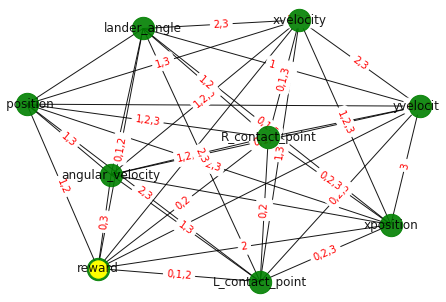

In [25]:
all_actions_graph(G0,G1,G2,G3,'all')

# 9. Simplified and Highlighted Causal Network (Project Step 4)

Top 40% of Edges, All highlighted


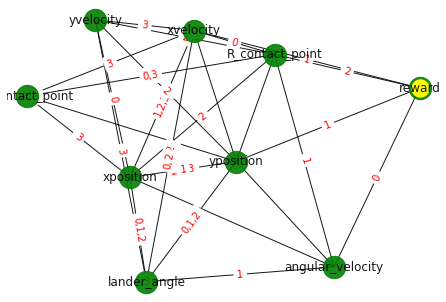

In [26]:
G0=auto_combined_graph(df_action0, edges0, 0.4)
G1=auto_combined_graph(df_action1, edges1, 0.4)
G2=auto_combined_graph(df_action2, edges2, 0.4)
G3=auto_combined_graph(df_action3, edges3, 0.4)
print('Top 40% of Edges, All highlighted')
all_actions_graph(G0,G1,G2,G3,'all')

Top 30% of Edges, Action 0 highlighted


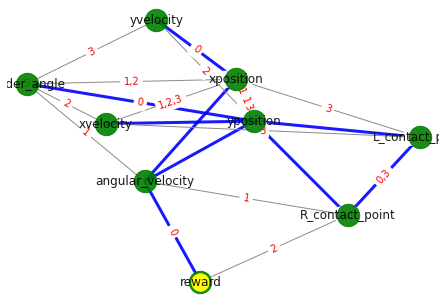

In [28]:
G0=auto_combined_graph(df_action0, edges0, 0.3)
G1=auto_combined_graph(df_action1, edges1, 0.3)
G2=auto_combined_graph(df_action2, edges2, 0.3)
G3=auto_combined_graph(df_action3, edges3, 0.3)
print('Top 30% of Edges, Action 0 highlighted')
all_actions_graph(G0,G1,G2,G3,0)

Top 30% of Edges, Action 2 highlighted


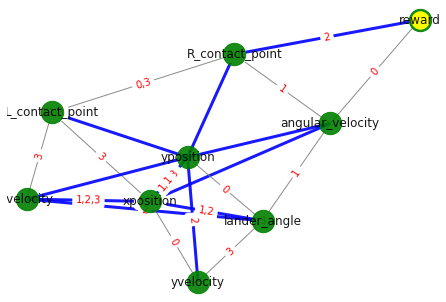

In [32]:
G0=auto_combined_graph(df_action0, edges0, 0.3)
G1=auto_combined_graph(df_action1, edges1, 0.3)
G2=auto_combined_graph(df_action2, edges2, 0.3)
G3=auto_combined_graph(df_action3, edges3, 0.3)
print('Top 30% of Edges, Action 2 highlighted')
all_actions_graph(G0,G1,G2,G3,2)